In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
from pandas.io import sql
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
print("="*45)
print ("Capstone Project - Insurance Premium Data")
print("="*45)

Capstone Project - Insurance Premium Data


# Start of Exploratory Data Analysis 

In [3]:
insurance = "insurance.csv"
df = pd.read_csv(insurance, encoding = 'utf-8')
pd.set_option('precision', 1)
df.head()

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_status
0,19,female,27.9,0,yes,southwest,16884.9,Youth,Overweight
1,18,male,33.8,1,no,southeast,1725.6,Youth,Overweight
2,28,male,33.0,3,no,southeast,4449.5,Millennials,Overweight
3,33,male,22.7,0,no,northwest,21984.5,Millennials,Healthy
4,32,male,28.9,0,no,northwest,3866.9,Millennials,Overweight


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   sex         1338 non-null   object 
 2   bmi         1338 non-null   float64
 3   children    1338 non-null   int64  
 4   smoker      1338 non-null   object 
 5   region      1338 non-null   object 
 6   charges     1338 non-null   float64
 7   age_group   1338 non-null   object 
 8   bmi_status  1338 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB


In [5]:
column_names = ['Age', 'Gender', 'BMI', "Children", 'Smoker', 'Region', 'Total_charges', 'Age_group', 'BMI_status']
df = pd.read_csv(insurance, names=column_names, skiprows=1)
df.head()

,Age,Gender,BMI,Children,Smoker,Region,Total_charges,Age_group,BMI_status
0,19,female,27.9,0,yes,southwest,16884.9,Youth,Overweight
1,18,male,33.8,1,no,southeast,1725.6,Youth,Overweight
2,28,male,33.0,3,no,southeast,4449.5,Millennials,Overweight
3,33,male,22.7,0,no,northwest,21984.5,Millennials,Healthy
4,32,male,28.9,0,no,northwest,3866.9,Millennials,Overweight


In [6]:
df.isnull().sum()

Age              0
Gender           0
BMI              0
Children         0
Smoker           0
Region           0
Total_charges    0
Age_group        0
BMI_status       0
dtype: int64

In [7]:
df.describe()

,Age,BMI,Children,Total_charges
count,1338.0,1338.0,1338.0,1338.0
mean,39.2,30.7,1.1,13270.4
std,14.0,6.1,1.2,12110.0
min,18.0,16.0,0.0,1121.9
25%,27.0,26.3,0.0,4740.3
50%,39.0,30.4,1.0,9382.0
75%,51.0,34.7,2.0,16639.9
max,64.0,53.1,5.0,63770.4


In [8]:
df[df['Gender'] == 'male']

,Age,Gender,BMI,Children,Smoker,Region,Total_charges,Age_group,BMI_status
1,18,male,33.8,1,no,southeast,1725.6,Youth,Overweight
2,28,male,33.0,3,no,southeast,4449.5,Millennials,Overweight
3,33,male,22.7,0,no,northwest,21984.5,Millennials,Healthy
4,32,male,28.9,0,no,northwest,3866.9,Millennials,Overweight
8,37,male,29.8,2,no,northeast,6406.4,Millennials,Overweight
...,...,...,...,...,...,...,...,...,...
1324,31,male,25.9,1,no,northwest,4239.9,Millennials,Overweight
1325,61,male,33.5,0,no,northeast,13143.3,Boomers,Overweight
1327,51,male,30.0,1,no,southeast,9377.9,Gen X,Overweight
1329,52,male,38.6,2,no,southwest,10325.2,Gen X,Overweight


In [9]:
df[df['Gender'] == 'female']

,Age,Gender,BMI,Children,Smoker,Region,Total_charges,Age_group,BMI_status
0,19,female,27.9,0,yes,southwest,16884.9,Youth,Overweight
5,31,female,25.7,0,no,southeast,3756.6,Millennials,Overweight
6,46,female,33.4,1,no,southeast,8240.6,Gen X,Overweight
7,37,female,27.7,3,no,northwest,7281.5,Millennials,Overweight
9,60,female,25.8,0,no,northwest,28923.1,Boomers,Overweight
...,...,...,...,...,...,...,...,...,...
1332,52,female,44.7,3,no,southwest,11411.7,Gen X,Overweight
1334,18,female,31.9,0,no,northeast,2206.0,Youth,Overweight
1335,18,female,36.9,0,no,southeast,1629.8,Youth,Overweight
1336,21,female,25.8,0,no,southwest,2007.9,Youth,Overweight


In [10]:
df = df.astype(str)

In [11]:
df[(df['Age'] > '45') & (df['Total_charges'] > '20000')]

,Age,Gender,BMI,Children,Smoker,Region,Total_charges,Age_group,BMI_status
6,46,female,33.44,1,no,southeast,8240.5896,Gen X,Overweight
9,60,female,25.84,0,no,northwest,28923.13692,Boomers,Overweight
11,62,female,26.29,0,yes,southeast,27808.7251,Boomers,Overweight
39,60,male,39.9,0,yes,southwest,48173.361,Boomers,Overweight
45,55,male,37.3,0,no,southwest,20630.28351,Gen X,Overweight
...,...,...,...,...,...,...,...,...,...
1293,46,male,25.745,3,no,northwest,9301.89355,Gen X,Overweight
1301,62,male,30.875,3,yes,northwest,46718.16325,Boomers,Overweight
1321,62,male,26.695,0,yes,northeast,28101.33305,Boomers,Overweight
1327,51,male,30.03,1,no,southeast,9377.9047,Gen X,Overweight


In [12]:
df[(df['BMI'] > '25') & (df['Smoker'] == 'yes')]

,Age,Gender,BMI,Children,Smoker,Region,Total_charges,Age_group,BMI_status
0,19,female,27.9,0,yes,southwest,16884.924,Youth,Overweight
11,62,female,26.29,0,yes,southeast,27808.7251,Boomers,Overweight
14,27,male,42.13,0,yes,southeast,39611.7577,Millennials,Overweight
19,30,male,35.3,0,yes,southwest,36837.467,Millennials,Overweight
23,34,female,31.92,1,yes,northeast,37701.8768,Millennials,Overweight
...,...,...,...,...,...,...,...,...,...
1308,25,female,30.2,0,yes,southwest,33900.653,Millennials,Overweight
1313,19,female,34.7,2,yes,southwest,36397.576,Youth,Overweight
1321,62,male,26.695,0,yes,northeast,28101.33305,Boomers,Overweight
1323,42,female,40.37,2,yes,southeast,43896.3763,Gen X,Overweight


In [13]:
df = df.astype ({"Age": int, "BMI": float, "Total_charges": float})

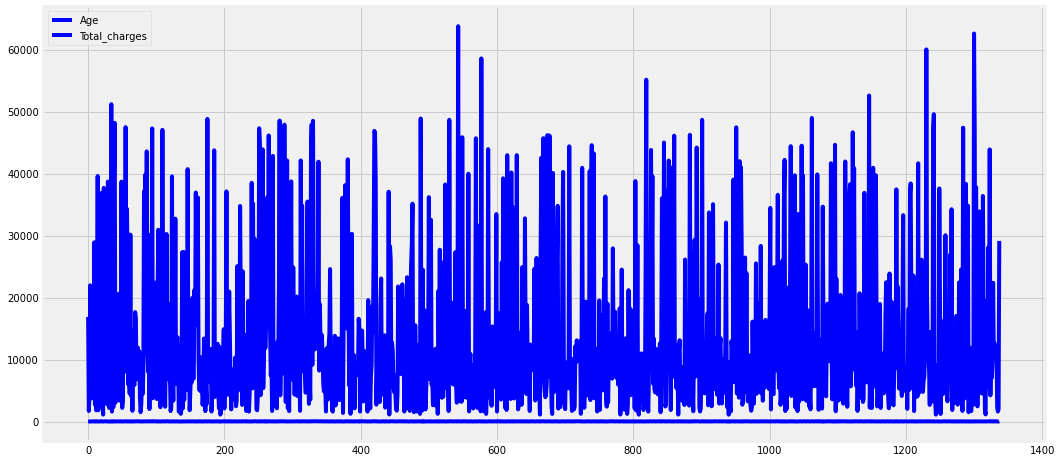

In [14]:
df[['Age', 'Total_charges']].plot(color='b', figsize=(16,8));

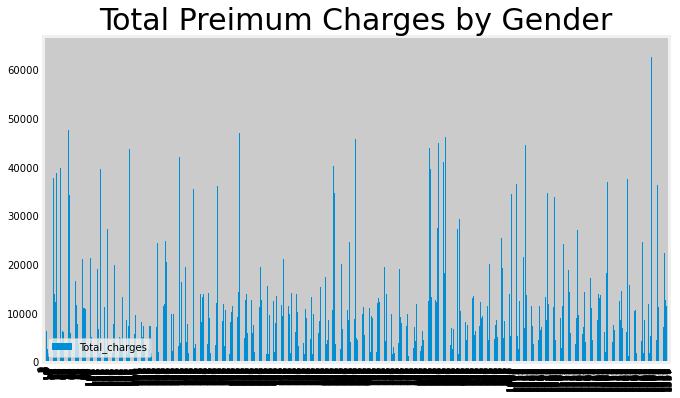

In [15]:
ax = df[['Total_charges', 'Gender']].plot(kind='bar', figsize=(10,6))
ax.set_title('Total Preimum Charges by Gender', fontsize=30)
ax.legend(loc=3)

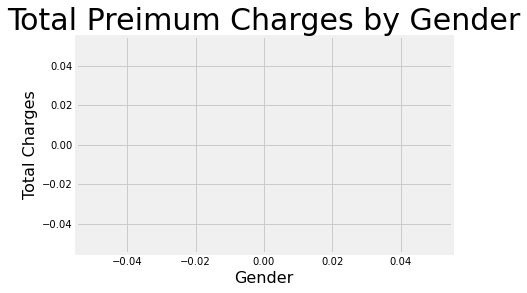

In [16]:
df = pd.DataFrame(columns =['Gender','Total_charges'])

New_Colors = ['green','blue']
plt.bar(df['Gender'], df['Total_charges'], color=New_Colors)
plt.title('Total Preimum Charges by Gender', fontsize=30)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Total Charges', fontsize=16)
plt.grid(True)
plt.show()

In [17]:
conn = sqlite3.connect('insurance.db.sqlite') # connect to the SQLite database using the line 
query = "SELECT age FROM insurance WHERE age > 30;"
df = pd.read_sql_query(query,conn) #converts SQLite data to a Panda data frame

In [18]:
import csv, sqlite3

con = sqlite3.connect(":memory:") # change to 'sqlite:///your_filename.db'
cur = con.cursor()
cur.execute("CREATE TABLE t (col1, col2);") # use your column names here

with open('insurance.csv','r') as fin: # `with` statement available in 2.5+
    # csv.DictReader uses first line in file for column headings by default
    dr = csv.DictReader(fin) # comma is default delimiter
    to_db = [(i['age'], i['charges'] ) for i in dr]

cur.executemany("INSERT INTO t (col1, col2) VALUES (?, ?);", to_db)
con.commit()
con.close()